In [1]:
# importando as bilbiotecas

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Importando o arquivo

CaminhoArquivo = './Arquivos/advertising.csv'

dados = pd.read_csv(CaminhoArquivo)

dados.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dados.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
dados.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
dados.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


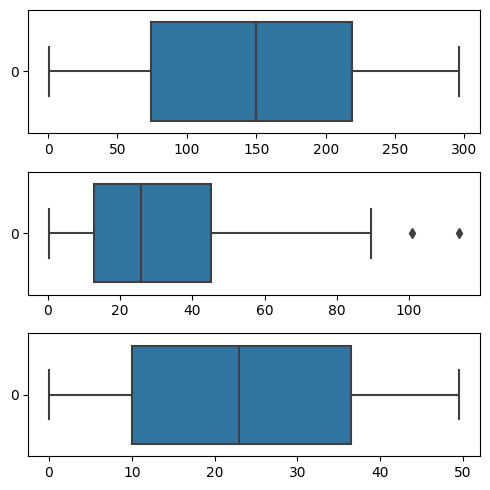

In [12]:
# ANÁLISE DE OUTLIERS

fig, axs = plt.subplots(3, figsize = (5,5)) # fig --> figura , axs --> eixo

plt1 = sns.boxplot(dados['TV'], ax = axs[0], orient = 'h')
plt2 = sns.boxplot(dados['Newspaper'], ax = axs[1], orient = 'h')
plt3 = sns.boxplot(dados['Radio'], ax = axs[2], orient= 'h')

plt.tight_layout()

In [22]:
dados.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

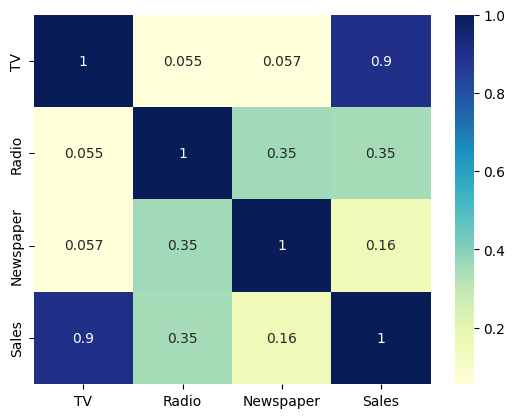

In [32]:
# GRÁFICO MAPA DE CALOR

sns.heatmap(dados.corr(),cmap = 'YlGnBu', annot = True)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


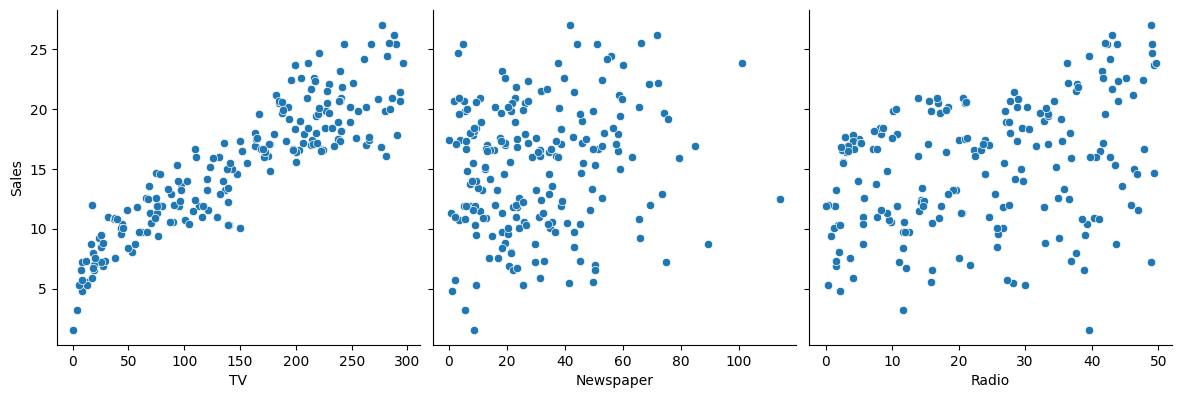

In [43]:
# TV X SALES
sns.pairplot(dados, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4,aspect=1, kind='scatter')



In [41]:
x = np.array(dados['TV'])
y = dados['Sales']

x = x.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

print('Tamanho dos dados para teste', len(x_test))
print('Tamanho dos dados para treino:', len(x_train))
print('Tamanho dos dados:', len(x))

Tamanho dos dados para teste 60
Tamanho dos dados para treino: 140
Tamanho dos dados: 200


In [42]:
modelo = LinearRegression()

modelo.fit(x_train, y_train)

LinearRegression()

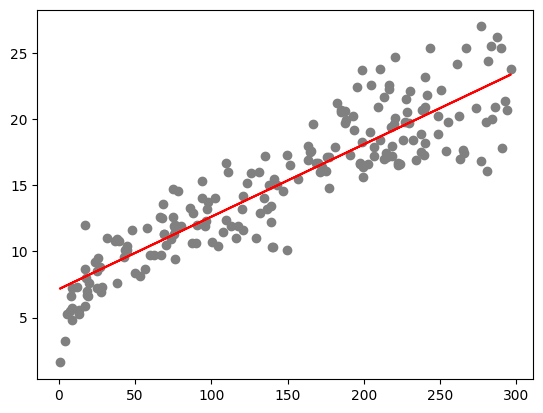

In [46]:
plt.scatter(x,y, color= 'gray')
plt.plot(x,modelo.predict(x),color = 'red')